# Pythagorean Expectation - MLB

This is a concept that comes from baseball. It was developed by the baseball analyst, Bill James, one of the great analysts of sports. It's basically about a relationship between winning and the success of teams as measured by points, goals, runs, score, depending on which sport we happen to be talking about. 

The formula basically states that the percentage of games a professional sports team will win across a given season should be proportional to the ratio of the square of the points/runs/goals scored by the team in the season, divided by the sum of squares of the points/runs/goals scored by the team and its opponents across the whole season:

```
wpc % = runs**2 / sum(home_runs ** 2 + conceeded_runs ** 2)

𝑤𝑖𝑛 𝑟𝑎𝑡𝑖𝑜(𝑏𝑎𝑠𝑒𝑏𝑎𝑙𝑙)=𝑟𝑢𝑛𝑠 𝑠𝑐𝑜𝑟𝑒𝑑𝑘𝑟𝑢𝑛𝑠 𝑠𝑐𝑜𝑟𝑒𝑑𝑘 + 𝑟𝑢𝑛𝑠 𝑎𝑙𝑙𝑜𝑤𝑒𝑑𝑘
```

This is a concept which can help to explain why teams are successful and can also be used as the basis for predicting results in the future. It’s a relationship that we can measure with data. We can actually calculate the Pythagorean Expectation for each team and then we can test whether it truly is related to the win percentage of the team.

#### Why is it useful?
* Pythagorean winning percentage can help to identify teams that have either overachieved or underachieved. When looking at a club with a surprisingly poor or surprisingly strong record early in the season, using the theory to determine a team's "expected" winning percentage for the remainder of the year can paint a more accurate picture of how things will play out than merely looking at actual winning percentage. (mlb.com)[https://www.mlb.com/glossary/advanced-stats/pythagorean-winning-percentage]

* The pythagorean ratio can tell us how many wins a team was meant to get.

* Winning more games than your Pythagorean Expectation tends to mean a team will decline the following season, while falling short of expectations in the cirrent year tends to mean a team will improve the following season.


### Step 1: Import the libraries needed & Load the dataset

In [94]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

pd.set_option('display.max_columns', None)
%matplotlib inline

In [3]:
columns = ['Date',
 'DoubleHeader',
 'DayOfWeek',
 'VisitingTeam',
 'VisitingTeamLeague',
 'VisitingTeamGameNumber',
 'HomeTeam',
 'HomeTeamLeague',
 'HomeTeamGameNumber',
 'VisitorRunsScored',
 'HomeRunsScore',
 'LengthInOuts',
 'DayNight',
 'CompletionInfo',
 'ForfeitInfo',
 'ProtestInfo',
 'ParkID',
 'Attendence',
 'Duration',
 'VisitorLineScore',
 'HomeLineScore',
 'VisitorAB',
 'VisitorH',
 'VisitorD',
 'VisitorT',
 'VisitorHR',
 'VisitorRBI',
 'VisitorSH',
 'VisitorSF',
 'VisitorHBP',
 'VisitorBB',
 'VisitorIBB',
 'VisitorK',
 'VisitorSB',
 'VisitorCS',
 'VisitorGDP',
 'VisitorCI',
 'VisitorLOB',
 'VisitorPitchers',
 'VisitorER',
 'VisitorTER',
 'VisitorWP',
 'VisitorBalks',
 'VisitorPO',
 'VisitorA',
 'VisitorE',
 'VisitorPassed',
 'VisitorDB',
 'VisitorTP',
 'HomeAB',
 'HomeH',
 'HomeD',
 'HomeT',
 'HomeHR',
 'HomeRBI',
 'HomeSH',
 'HomeSF',
 'HomeHBP',
 'HomeBB',
 'HomeIBB',
 'HomeK',
 'HomeSB',
 'HomeCS',
 'HomeGDP',
 'HomeCI',
 'HomeLOB',
 'HomePitchers',
 'HomeER',
 'HomeTER',
 'HomeWP',
 'HomeBalks',
 'HomePO',
 'HomeA',
 'HomeE',
 'HomePassed',
 'HomeDB',
 'HomeTP',
 'UmpireHID',
 'UmpireHName',
 'Umpire1BID',
 'Umpire1BName',
 'Umpire2BID',
 'Umpire2BName',
 'Umpire3BID',
 'Umpire3BName',
 'UmpireLFID',
 'UmpireLFName',
 'UmpireRFID',
 'UmpireRFName',
 'VisitorManagerID',
 'VisitorManagerName',
 'HomeManagerID',
 'HomeManagerName',
 'WinningPitcherID',
 'WinningPitcherName',
 'LosingPitcherID',
 'LosingPitcherNAme',
 'SavingPitcherID',
 'SavingPitcherName',
 'GameWinningRBIID',
 'GameWinningRBIName',
 'VisitorStartingPitcherID',
 'VisitorStartingPitcherName',
 'HomeStartingPitcherID',
 'HomeStartingPitcherName',
 'VisitorBatting1PlayerID',
 'VisitorBatting1Name',
 'VisitorBatting1Position',
 'VisitorBatting2PlayerID',
 'VisitorBatting2Name',
 'VisitorBatting2Position',
 'VisitorBatting3PlayerID',
 'VisitorBatting3Name',
 'VisitorBatting3Position',
 'VisitorBatting4PlayerID',
 'VisitorBatting4Name',
 'VisitorBatting4Position',
 'VisitorBatting5PlayerID',
 'VisitorBatting5Name',
 'VisitorBatting5Position',
 'VisitorBatting6PlayerID',
 'VisitorBatting6Name',
 'VisitorBatting6Position',
 'VisitorBatting7PlayerID',
 'VisitorBatting7Name',
 'VisitorBatting7Position',
 'VisitorBatting8PlayerID',
 'VisitorBatting8Name',
 'VisitorBatting8Position',
 'VisitorBatting9PlayerID',
 'VisitorBatting9Name',
 'VisitorBatting9Position',
 'HomeBatting1PlayerID',
 'HomeBatting1Name',
 'HomeBatting1Position',
 'HomeBatting2PlayerID',
 'HomeBatting2Name',
 'HomeBatting2Position',
 'HomeBatting3PlayerID',
 'HomeBatting3Name',
 'HomeBatting3Position',
 'HomeBatting4PlayerID',
 'HomeBatting4Name',
 'HomeBatting4Position',
 'HomeBatting5PlayerID',
 'HomeBatting5Name',
 'HomeBatting5Position',
 'HomeBatting6PlayerID',
 'HomeBatting6Name',
 'HomeBatting6Position',
 'HomeBatting7PlayerID',
 'HomeBatting7Name',
 'HomeBatting7Position',
 'HomeBatting8PlayerID',
 'HomeBatting8Name',
 'HomeBatting8Position',
 'HomeBatting9PlayerID',
 'HomeBatting9Name',
 'HomeBatting9Position',
 'AdditionalInfo',
 'AcquisitionInfo']

In [72]:
# Create a dataframe out of the txt file
mlb_df = pd.read_csv("datasets/gl2023.txt", sep=',', header=None, names=columns)
mlb_df.head()

,Date,DoubleHeader,DayOfWeek,VisitingTeam,VisitingTeamLeague,VisitingTeamGameNumber,HomeTeam,HomeTeamLeague,HomeTeamGameNumber,VisitorRunsScored,HomeRunsScore,LengthInOuts,DayNight,CompletionInfo,ForfeitInfo,ProtestInfo,ParkID,Attendence,Duration,VisitorLineScore,HomeLineScore,VisitorAB,VisitorH,VisitorD,VisitorT,VisitorHR,VisitorRBI,VisitorSH,VisitorSF,VisitorHBP,VisitorBB,VisitorIBB,VisitorK,VisitorSB,VisitorCS,VisitorGDP,VisitorCI,VisitorLOB,VisitorPitchers,VisitorER,VisitorTER,VisitorWP,VisitorBalks,VisitorPO,VisitorA,VisitorE,VisitorPassed,VisitorDB,VisitorTP,HomeAB,HomeH,HomeD,HomeT,HomeHR,HomeRBI,HomeSH,HomeSF,HomeHBP,HomeBB,HomeIBB,HomeK,HomeSB,HomeCS,HomeGDP,HomeCI,HomeLOB,HomePitchers,HomeER,HomeTER,HomeWP,HomeBalks,HomePO,HomeA,HomeE,HomePassed,HomeDB,HomeTP,UmpireHID,UmpireHName,Umpire1BID,Umpire1BName,Umpire2BID,Umpire2BName,Umpire3BID,Umpire3BName,UmpireLFID,UmpireLFName,UmpireRFID,UmpireRFName,VisitorManagerID,VisitorManagerName,HomeManagerID,HomeManagerName,WinningPitcherID,WinningPitcherName,LosingPitcherID,LosingPitcherNAme,SavingPitcherID,SavingPitcherName,GameWinningRBIID,GameWinningRBIName,VisitorStartingPitcherID,VisitorStartingPitcherName,HomeStartingPitcherID,HomeStartingPitcherName,VisitorBatting1PlayerID,VisitorBatting1Name,VisitorBatting1Position,VisitorBatting2PlayerID,VisitorBatting2Name,VisitorBatting2Position,VisitorBatting3PlayerID,VisitorBatting3Name,VisitorBatting3Position,VisitorBatting4PlayerID,VisitorBatting4Name,VisitorBatting4Position,VisitorBatting5PlayerID,VisitorBatting5Name,VisitorBatting5Position,VisitorBatting6PlayerID,VisitorBatting6Name,VisitorBatting6Position,VisitorBatting7PlayerID,VisitorBatting7Name,VisitorBatting7Position,VisitorBatting8PlayerID,VisitorBatting8Name,VisitorBatting8Position,VisitorBatting9PlayerID,VisitorBatting9Name,VisitorBatting9Position,HomeBatting1PlayerID,HomeBatting1Name,HomeBatting1Position,HomeBatting2PlayerID,HomeBatting2Name,HomeBatting2Position,HomeBatting3PlayerID,HomeBatting3Name,HomeBatting3Position,HomeBatting4PlayerID,HomeBatting4Name,HomeBatting4Position,HomeBatting5PlayerID,HomeBatting5Name,HomeBatting5Position,HomeBatting6PlayerID,HomeBatting6Name,HomeBatting6Position,HomeBatting7PlayerID,HomeBatting7Name,HomeBatting7Position,HomeBatting8PlayerID,HomeBatting8Name,HomeBatting8Position,HomeBatting9PlayerID,HomeBatting9Name,HomeBatting9Position,AdditionalInfo,AcquisitionInfo
0,20230330,0,Thu,MIL,NL,1,CHN,NL,1,0,4,51,D,NaN,NaN,NaN,CHI11,36054.0,141,000000000,00400000x,29,4,0,0,0,0,0,0,0,5,0,12,0,0,2,0,7,4,4,4,0,0,24,12,1,0,1,0,30,6,0,0,0,3,0,0,1,4,0,5,0,0,1,0,7,4,0,0,1,0,27,13,1,2,2,0,kulpr901,Ron Kulpa,blasc901,Cory Blaser,torrc901,Carlos Torres,viscj901,Jansen Visconti,NaN,(none),NaN,(none),counc001,Craig Counsell,rossd001,David Ross,strom001,Marcus Stroman,burnc002,Corbin Burnes,NaN,(none),swand001,Dansby Swanson,burnc002,Corbin Burnes,strom001,Marcus Stroman,yelic001,Christian Yelich,7,winkj002,Jesse Winker,10,adamw002,Willy Adames,6,tellr001,Rowdy Tellez,3,contw002,William Contreras,2,urial001,Luis Urias,5,mitcg001,Garrett Mitchell,8,andeb006,Brian Anderson,9,turab002,Brice Turang,4,hoern001,Nico Hoerner,4,swand001,Dansby Swanson,6,happi001,Ian Happ,7,bellc002,Cody Bellinger,8,manct001,Trey Mancini,10,gomey001,Yan Gomes,2,hosme001,Eric Hosmer,3,wisdp001,Patrick Wisdom,5,mastm001,Miles Mastrobuoni,9,NaN,Y
1,20230330,0,Thu,PIT,NL,1,CIN,NL,1,5,4,54,D,NaN,NaN,NaN,CIN09,44063.0,182,001300010,100120000,30,6,1,0,1,4,1,1,0,9,0,11,2,0,1,0,9,5,4,4,0,0,27,9,1,0,2,0,33,7,1,1,1,3,0,0,0,6,0,15,0,1,1,0,8,6,5,5,1,0,27,7,0,0,1,0,wegnm901,Mark Wegner,drecb901,Bruce Dreckman,sches901,Stu Scheurwater,moorm901,Malachi Moore,NaN,(none),NaN,(none),sheld801,Derek Shelton,belld002,David Bell,zastr001,Rob Zastryzny,farmb001,Buck Farmer,bednd001,David Bednar,cruzo001,Oneil Cruz,kellm003,Mitch Keller,greeh001,Hunter Greene,cruzo001,Oneil Cruz,6,reynb001,Bryan Reynolds,7,mccua001,Andrew McCutchen,10,santc002,Carlos Santana,3,smitc008,Canaan Smith-Njigba,9,hayek001,Ke'B

In [73]:
mlb_df.shape

(2430, 161)

In [74]:
# Retain only the necessary columns - since the pythagorean expectation compares the runs a team made vs the ones they conceeded, we only need Date, HomeTeam, VisitingTeam,VisitorRunsScored, HomeRunsScore

mlb_df = mlb_df[['HomeTeam', 'VisitingTeam', 'VisitorRunsScored', 'HomeRunsScore', 'Date']]
mlb_df = mlb_df.rename(columns={'VisitorRunsScored':'VisR', 'HomeRunsScore': 'HomeR'})
mlb_df.head()

,HomeTeam,VisitingTeam,VisR,HomeR,Date
0,CHN,MIL,0,4,20230330
1,CIN,PIT,5,4,20230330
2,LAN,ARI,2,8,20230330
3,MIA,NYN,5,3,20230330
4,SDN,COL,7,2,20230330


### Step 2: Data Wrangling & EDA

In [75]:
mlb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2430 entries, 0 to 2429
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   HomeTeam      2430 non-null   object
 1   VisitingTeam  2430 non-null   object
 2   VisR          2430 non-null   int64 
 3   HomeR         2430 non-null   int64 
 4   Date          2430 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 95.1+ KB


In [76]:
mlb_df.describe(include='all')

,HomeTeam,VisitingTeam,VisR,HomeR,Date
count,2430,2430,2430.000000,2430.000000,2.430000e+03
unique,30,30,NaN,NaN,NaN
top,CHN,MIL,NaN,NaN,NaN
freq,81,81,NaN,NaN,NaN
mean,NaN,NaN,4.634979,4.596296,2.023066e+07
std,NaN,NaN,3.285711,3.150994,1.760335e+02
min,NaN,NaN,0.000000,0.000000,2.023033e+07
25%,NaN,NaN,2.000000,2.000000,2.023051e+07
50%,NaN,NaN,4.000000,4.000000,2.023063e+07
75%,NaN,NaN,6.000000,6.000000,2.023082e+07


In [77]:
mlb_df.shape

(2430, 5)

The dataset contains 2430 rows and 5 columns. 
It has 2 object columns with 3 numerical columns.
There aren't any missing values so need for any data cleaning

### Step 3: Feature Engineering

In [78]:
mlb_df.head(1)

,HomeTeam,VisitingTeam,VisR,HomeR,Date
0,CHN,MIL,0,4,20230330


In [79]:
# Need to know which team won both at home and away. There aren't any draws in the MLB League
mlb_df['Hwin'] = np.where(mlb_df.HomeR > mlb_df.VisR, 1, 0)
mlb_df['Awin'] = np.where(mlb_df.VisR > mlb_df.HomeR, 1, 0)
mlb_df['count'] = 1
mlb_df.head(1)

,HomeTeam,VisitingTeam,VisR,HomeR,Date,Hwin,Awin,count
0,CHN,MIL,0,4,20230330,1,0,1


The data refers to games played by 2 teams, we want a list of runs scored and conceeded by each team together with their win percentage, hence we'll separate the home and away matches 

In [80]:
# Group by team and get the total number of runs they scored vs conceeded at home
mlb_home_df = mlb_df.groupby('HomeTeam')[['Hwin','HomeR','VisR','count']].sum().reset_index()
mlb_home_df = mlb_home_df.rename(columns={'HomeTeam':'team','VisR':'VisRh','HomeR':'HomRh','count':'Gh'})
mlb_home_df.head(1)

,team,Hwin,HomRh,VisRh,Gh
0,ANA,38,364,412,81


In [81]:
# Group by team and get the total number of runs they scored vs conceeded in away games
mlb_away_df = mlb_df.groupby('VisitingTeam')[['Awin','HomeR','VisR','count']].sum().reset_index()
mlb_away_df = mlb_away_df.rename(columns={'VisitingTeam':'team','VisR':'VisRa','HomeR':'HomRa','count':'Ga'})
mlb_away_df.head(1)

,team,Awin,HomRa,VisRa,Ga
0,ANA,35,417,375,81


In [82]:
# Let's merge the 2 dataframes
mlb_df = mlb_home_df.merge(mlb_away_df, on=['team'])
mlb_df.head(1)

,team,Hwin,HomRh,VisRh,Gh,Awin,HomRa,VisRa,Ga
0,ANA,38,364,412,81,35,417,375,81


In [83]:
# Sum up the total wins, games played, runs scored and runs conceeded
mlb_df['Wins'] = mlb_df.Hwin + mlb_df.Awin
mlb_df['Games_played'] = mlb_df.Gh + mlb_df.Ga
mlb_df['R'] = mlb_df.HomRh + mlb_df.VisRa
mlb_df['RunsA'] = mlb_df.VisRh + mlb_df.HomRa

In [84]:
mlb_df.head(1)

,team,Hwin,HomRh,VisRh,Gh,Awin,HomRa,VisRa,Ga,Wins,Games_played,R,RunsA
0,ANA,38,364,412,81,35,417,375,81,73,162,739,829


In [100]:
# Define the win percentage & the pythagorean expectation
coefficient = 1.83
mlb_df['wpc'] = mlb_df.Wins / mlb_df.Games_played
mlb_df['pyth_e'] = mlb_df.R ** coefficient / (mlb_df.R ** coefficient + mlb_df.RunsA ** coefficient)
mlb_df.head()

,team,Hwin,HomRh,VisRh,Gh,Awin,HomRa,VisRa,Ga,Wins,Games_played,R,RunsA,wpc,pyth_e
0,ANA,38,364,412,81,35,417,375,81,73,162,739,829,0.450617,0.447616
1,ARI,43,365,365,81,41,396,381,81,84,162,746,761,0.518519,0.490893
2,ATL,52,477,375,81,52,341,470,81,104,162,947,716,0.641975,0.625206
3,BAL,49,362,332,81,52,346,445,81,101,162,807,678,0.623457,0.579018
4,BOS,39,408,414,81,39,362,364,81,78,162,772,776,0.481481,0.497636


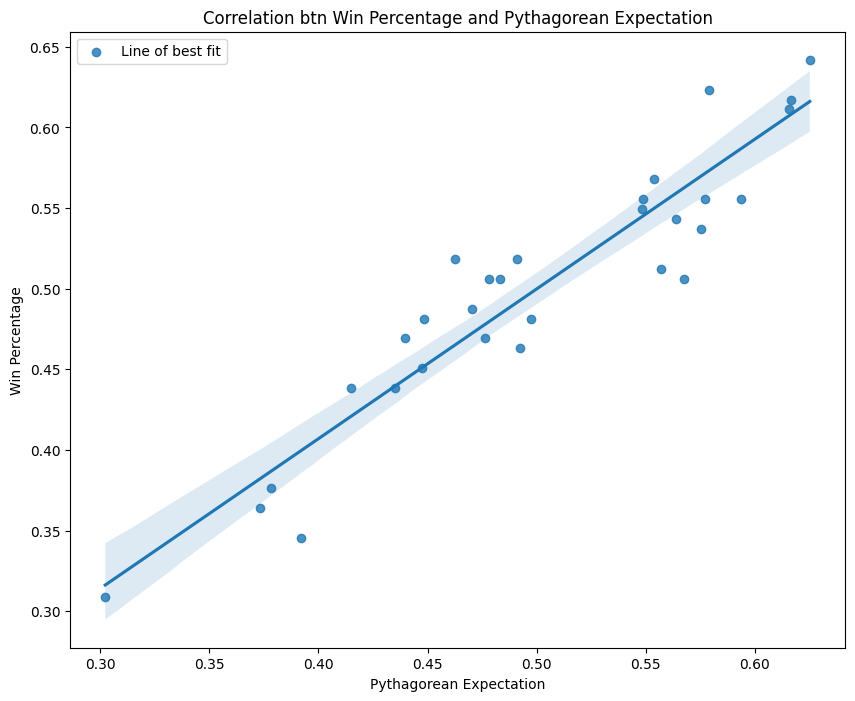

In [101]:
# Generate correlation btn win percentage and the pythagorean expectation
plt.figure(figsize=(10,8))
sns.regplot(x='pyth_e', y='wpc', data=mlb_df, label='Line of best fit')
plt.title('Correlation btn Win Percentage and Pythagorean Expectation')
plt.ylabel('Win Percentage')
plt.xlabel('Pythagorean Expectation')
plt.legend()
plt.show()

In [102]:
# Finally we generate a regression.

pyth_lm = smf.ols(formula = 'wpc ~ Wins', data=mlb_df).fit()
pyth_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    wpc   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.879e+31
Date:                Thu, 19 Sep 2024   Prob (F-statistic):               0.00
Time:                        06:43:48   Log-Likelihood:                 1063.5
No. Observations:                  30   AIC:                            -2123.
Df Residuals:                      28   BIC:                            -2120.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.776e-17   1.17e-16      0.238      0.814   -2.11e-16    2.67e-16
Wins           0.0062   1.42e-18   4.34e+15      0.000       0.006       0.006
==============================================================================
Omnibus:                        2.308   Durbin-Watson:                   0.489
Prob(Omnibus):                  0.315   Jarque-Bera (JB):                1.133
Skew:                           0.061   Prob(JB):                        0.568
Kurtosis:                       3.944   Cond. No.                         521.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The summary of the regression model shows a p value of 0.00 which lets to say that the model is highly significant. When the R-sqauared value which is 1 is examined, it can be said that, variance of “Winning Percent” can be explained by “Pythagorean Expectation”.